# Project 3: Industrialization and CO₂ Emissions in Southeast Asia

**Research Question:**  
With Southeast Asia experiencing rapid industrialization, has the industry’s share of total CO₂ emissions increased accordingly?

Southeast Asia is an emerging region that has demonstrated robust economic growth driven by rapid and sustained industrialization. Over the past few decades, the region has become a key player in global manufacturing and supply chains. Numerous studies show that per-capita GDP has increased seven-fold, while headcount poverty rates have fallen dramatically, from around 70% to just 5%. However, this industrial expansion may also contribute to rising emissions. This data-based research, using World Bank Open Data, aims to examine the relationship between industrialization and the increasing share of CO₂ emissions originating from industry.

## 1. Data Preparation

### 1.1 Import Packages and Load the Data

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [293]:
# import files
em_df = pd.read_csv("Emission_WorldBank.csv")
ind_df = pd.read_csv("Industrialization_WorldBank.csv")


### 1.2 Filter and Select Southeast Asian Countries Only

In [294]:
asean_countries = [
    "Brunei Darussalam",
    "Cambodia",
    "Indonesia",
    "Lao PDR",
    "Malaysia",
    "Myanmar",
    "Philippines",
    "Singapore",
    "Thailand",
    "Timor-Leste",
    "Viet Nam"
]

# Filter to keep ASEAN member states only
em_asean = em_df[em_df["Country Name"].isin(asean_countries)].copy()
ind_asean = ind_df[ind_df["Country Name"].isin(asean_countries)].copy()

### 1.3 Check Data Type

In [295]:
print
display(em_asean.sample(7))
em_asean.dtypes

,Time,Time Code,Country Name,Country Code,Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5],Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e) [EN.GHG.CO2.AG.MT.CE.AR5],Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e) [EN.GHG.CO2.BU.MT.CE.AR5],Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e) [EN.GHG.CO2.FE.MT.CE.AR5],Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e) [EN.GHG.CO2.IC.MT.CE.AR5],Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e) [EN.GHG.CO2.IP.MT.CE.AR5],Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e) [EN.GHG.CO2.PI.MT.CE.AR5],Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e) [EN.GHG.CO2.TR.MT.CE.AR5],Carbon dioxide (CO2) emissions from Waste (Mt CO2e) [EN.GHG.CO2.WA.MT.CE.AR5]
3363,2012,YR2012,Singapore,SGP,50.1614,..,0.6233,5.5092,10.2,6.4331,20.3492,7.0106,0.036
1009,2003,YR2003,Viet Nam,VNM,77.6157,2.2002,9.2323,1.4189,19.6361,13.6719,15.7963,15.6523,0.0078
1199,2004,YR2004,Myanmar,MMR,10.63,0.0896,0.7634,0.6775,1.8846,0.3736,2.4883,4.3181,0.0349
3895,2014,YR2014,Singapore,SGP,53.8747,..,0.6007,4.6334,12.5954,9.4389,19.8385,6.7306,0.0372
5246,2019,YR2019,Thailand,THA,284.4396,2.2017,15.6914,21.8969,53.5753,29.4014,87.8759,73.7792,0.0177
5162,2019,YR2019,Lao PDR,LAO,19.3699,..,0.0706,0.0057,0.675,2.1457,13.9937,2.4653,0.014
6007,2022,YR2022,Philippines,PHL,150.6387,1.1971,13.3768,0.784,13.1742,11.7396,75.3688,34.8475,0.1508


Time                                                                                                      object
Time Code                                                                                                 object
Country Name                                                                                              object
Country Code                                                                                              object
Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]                  object
Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e) [EN.GHG.CO2.AG.MT.CE.AR5]                       object
Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e) [EN.GHG.CO2.BU.MT.CE.AR5]                 object
Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e) [EN.GHG.CO2.FE.MT.CE.AR5]       object
Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e) [EN.GHG.CO2.IC.MT.C

In [296]:
print

display(ind_asean.sample(7))
ind_asean.dtypes

,Time,Time Code,Country Name,Country Code,Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS],"Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]"
1465,2005,YR2005,Myanmar,MMR,14.6011416803076,17.512204636055,522.099544784661,1.95966396539679
4201,2015,YR2015,Viet Nam,VNM,22.7436711069265,34.2665466382117,2577.56885340113,4.93190773329022
1686,2006,YR2006,Indonesia,IDN,18.5912016211294,46.9435587410796,2244.0802226202,1.34794264068931
667,2002,YR2002,Myanmar,MMR,13.2519957991717,13.0068954922166,364.855800192477,2.22070502562137
6273,2023,YR2023,Philippines,PHL,18.4726399963992,28.1976229089543,3744.69763802928,2.0421035482067
4642,2017,YR2017,Malaysia,MYS,27.3737114222368,38.1147163565611,10293.7629205362,2.9358203805856
1970,2007,YR2007,Lao PDR,LAO,6.95818608550474,25.3930205228552,1301.08597549864,7.66062749777557


Time                                                                                      object
Time Code                                                                                 object
Country Name                                                                              object
Country Code                                                                              object
Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]    object
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]                object
GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]                                       object
Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]                  object
dtype: object

## 2 Data Cleaning and Merging

### 2.1 Convert Object to Float

In [297]:
#convert object to float, and replace missing values
emission_numeric_cols = [
    "Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]",
    "Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e) [EN.GHG.CO2.AG.MT.CE.AR5]",
    "Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e) [EN.GHG.CO2.BU.MT.CE.AR5]",
    "Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e) [EN.GHG.CO2.FE.MT.CE.AR5]",
    "Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e) [EN.GHG.CO2.IC.MT.CE.AR5]",
    "Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e) [EN.GHG.CO2.IP.MT.CE.AR5]",
    "Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e) [EN.GHG.CO2.PI.MT.CE.AR5]",
    "Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e) [EN.GHG.CO2.TR.MT.CE.AR5]",
    "Carbon dioxide (CO2) emissions from Waste (Mt CO2e) [EN.GHG.CO2.WA.MT.CE.AR5]",
]

for col in emission_numeric_cols:
    em_asean[col] = (
        em_asean[col]
        .replace("..", np.nan)
        .astype(float)
    )

# check the data type
print(em_asean[emission_numeric_cols].dtypes)

Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]                  float64
Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e) [EN.GHG.CO2.AG.MT.CE.AR5]                       float64
Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e) [EN.GHG.CO2.BU.MT.CE.AR5]                 float64
Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e) [EN.GHG.CO2.FE.MT.CE.AR5]       float64
Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e) [EN.GHG.CO2.IC.MT.CE.AR5]    float64
Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e) [EN.GHG.CO2.IP.MT.CE.AR5]              float64
Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e) [EN.GHG.CO2.PI.MT.CE.AR5]           float64
Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e) [EN.GHG.CO2.TR.MT.CE.AR5]                float64
Carbon dioxide (CO2) emissions from Waste (Mt CO2e) [EN.GHG.CO2.WA.MT.CE.AR5]           

In [298]:
ind_numeric_cols = [
    "Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]",
    "Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",
    "GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]",
    "Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",
]

for col in ind_numeric_cols:
    ind_asean[col] = (
        ind_asean[col]
        .replace("..", np.nan)
        .astype(float)
    )

# check the data type
print(ind_asean[ind_numeric_cols].dtypes)

Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]    float64
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]                float64
GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]                                       float64
Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]                  float64
dtype: object


### 2.2 Shorten Column Name

In [299]:
# rename all columns (deleting World Bank series code for simplicity)

em_asean = em_asean.rename(columns={
    "Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]":
        "Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e) [EN.GHG.CO2.AG.MT.CE.AR5]":
        "Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e) [EN.GHG.CO2.BU.MT.CE.AR5]":
        "Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e) [EN.GHG.CO2.FE.MT.CE.AR5]":
        "Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e) [EN.GHG.CO2.IC.MT.CE.AR5]":
        "Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e) [EN.GHG.CO2.IP.MT.CE.AR5]":
        "Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e) [EN.GHG.CO2.PI.MT.CE.AR5]":
        "Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e) [EN.GHG.CO2.TR.MT.CE.AR5]":
        "Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Waste (Mt CO2e) [EN.GHG.CO2.WA.MT.CE.AR5]":
        "Carbon dioxide (CO2) emissions from Waste (Mt CO2e)"
})

ind_asean = ind_asean.rename(columns={
    "Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]":
        "Employment in industry (% of total employment) (modeled ILO estimate)",
    "Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]":
        "Industry (including construction), value added (% of GDP)",
    "GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]":
        "GDP per capita (constant 2015 US$)",
    "Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]":
        "Foreign direct investment, net inflows (% of GDP)"
})

# check new names of the columns
print(em_asean.columns)
print(ind_asean.columns)


Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Waste (Mt CO2e)'],
      dtype='object')
Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Industry (including construction), value added (% of GDP)',
       'GDP per capita (co

In [300]:
# After renaming, clean unnecessary leftover columns

cols_to_drop = [
    "Time Code", "Time Code_x", "Time Code_y",
    "Country Code", "Country Code_x", "Country Code_y",
    "Y"
]

em_asean = em_asean.drop(columns=cols_to_drop, errors='ignore')
ind_asean = ind_asean.drop(columns=cols_to_drop, errors='ignore')


print(em_asean.columns)
print(ind_asean.columns)


Index(['Time', 'Country Name',
       'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Waste (Mt CO2e)'],
      dtype='object')
Index(['Time', 'Country Name',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Industry (including construction), value added (% of GDP)',
       'GDP per capita (constant 2015 US$)',
       'Foreign direct investment, net 

### 2.3 Create New Columns

In [301]:
# Create Industry CO2 column
em_asean["Industry CO2 (Mt)"] = (
    em_asean["Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)"] +
    em_asean["Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)"]
)

# Create Industry Share column
em_asean["Industry Share of CO2"] = (
    em_asean["Industry CO2 (Mt)"] /
    em_asean["Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)"]
)

# check new column
em_asean[["Industry CO2 (Mt)", "Industry Share of CO2"]].head()


,Industry CO2 (Mt),Industry Share of CO2
28,0.2717,0.044727
33,0.1036,0.051777
90,84.1716,0.281423
108,0.1469,0.157196
120,36.2158,0.276922


### 2.4  Merge Dataframes

In [302]:
merged = pd.merge(
    em_asean,
    ind_asean,
    on=["Country Name", "Time"],
    how="inner"
)

# Quick check
merged.head()


,Time,Country Name,Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e),Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e),Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e),Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e),Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e),Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e),Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e),Carbon dioxide (CO2) emissions from Waste (Mt CO2e),Industry CO2 (Mt),Industry Share of CO2,Employment in industry (% of total employment) (modeled ILO estimate),"Industry (including construction), value added (% of GDP)",GDP per capita (constant 2015 US$),"Foreign direct investment, net inflows (% of GDP)"
0,2000,Brunei Darussalam,6.0746,NaN,0.0601,2.9010,0.1411,0.1306,2.0325,0.8083,0.0012,0.2717,0.044727,21.466008,66.266583,37509.598327,8.364135
1,2000,Cambodia,2.0009,NaN,0.1940,0.0000,0.0708,0.0328,0.3778,1.3204,0.0051,0.1036,0.051777,8.536022,21.645599,598.561915,3.202576
2,2000,Indonesia,299.0923,3.5589,45.0237,41.6090,57.9430,26.2286,61.9486,62.6861,0.0943,84.1716,0.281423,17.437065,41.969075,1828.102660,-2.757440
3,2000,Lao PDR,0.9345,NaN,0.0062,0.0002,0.0851,0.0618,0.0000,0.7747,0.0065,0.1469,0.157196,4.714827,16.477069,917.228039,1.957604
4,2000,Malaysia,130.7796,1.0480,4.3041,19.5228,25.8474,10.3684,37.4420,32.2052,0.0417,36.2158,0.276922,32.026336,48.320571,6455.614198,4.038429


## 3. Visualization and Analysis

### 3.1 Calculate Neccesary Variables

We calculate several variables to track ASEAN’s industrialization and emissions over time. The averages (industry CO₂ share, industry value added, and employment in industry) show how the structure of ASEAN’s economy is changing, while the totals (total CO₂ and industry CO₂) show how emissions are rising across the region. Together, these indicators help us see whether growing industrial activity is linked to higher CO₂ emissions.

In [303]:
# ASEAN average of industry CO2 share
asean_avg_industry_share = merged.groupby("Time")["Industry Share of CO2"].mean()

# ASEAN average of industry value added (% of GDP)
asean_avg_value_added = merged.groupby("Time")["Industry (including construction), value added (% of GDP)"].mean()

# ASEAN average of industry employment (%)
asean_avg_employment = merged.groupby("Time")["Employment in industry (% of total employment) (modeled ILO estimate)"].mean()

# ASEAN total CO2 emissions
asean_total_co2 = merged.groupby("Time")["Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)"].sum()

# ASEAN total industry CO2 emissions
asean_industry_co2 = merged.groupby("Time")["Industry CO2 (Mt)"].sum()


### 3.2 Create Graph

#### 3.2.1 ASEAN Average Industry Value Added

In [304]:
import plotly.express as px

fig = px.line(
    x=asean_avg_value_added.index,
    y=asean_avg_value_added.values,
    markers=True,
)

fig.update_layout(
    title="ASEAN Average Industry Value Added (% of GDP)",
    xaxis_title="Year",
    yaxis_title="Industry Value Added (% of GDP)",
)

fig.show()

Overall, industry in ASEAN slowly climbed from around 33% of GDP in 2000 to about 36% in 2023, so the trend is generally upward even with some ups and downs in the middle.

#### 3.2.2 ASEAN Average Employment in Industry

In [305]:
fig = px.line(
    x=asean_avg_employment.index,
    y=asean_avg_employment.values,
    markers=True,
)

fig.update_layout(
    title="ASEAN Average Employment in Industry",
    xaxis_title="Year",
    yaxis_title="Employment in Industry (%)",
)

fig.show()



Employment in industry also moves up overall, from around 16.5% in 2000 to just above 20% in recent years,showing that more people in ASEAN are working in industrial sectors over time.

#### 3.2.3 ASEAN Total CO2 Emission

In [306]:
fig = px.line(
    x=asean_total_co2.index,
    y=asean_total_co2.values,
    markers=True,
)

fig.update_layout(
    title="ASEAN Total CO₂ Emissions (Mt CO₂e)",
    xaxis_title="Year",
    yaxis_title="Total CO₂ Emissions (Mt)",
)

fig.show()



ASEAN’s total CO₂ emissions keep climbing—from around 800 Mt in 2000 to almost 1900 Mt in 2023—showing a clear, steady rise as the region grows and industrializes. However, industry may not be the only cause of this increase, since other sector may also contribute to this rise.

#### 3.2.3 ASEAN Average Industry Share of CO2 Emission

In [307]:
# Convert share to percentage
asean_avg_industry_share_pct = asean_avg_industry_share * 100

fig = px.line(
    x=asean_avg_industry_share_pct.index,
    y=asean_avg_industry_share_pct.values,
    markers=True,
)

fig.update_layout(
    title="ASEAN Average Industry Share of CO₂ Emissions",
    xaxis_title="Year",
    yaxis_title="Industry Share of CO₂ (%)",

)

fig.show()



The industry share of CO₂ emissions in ASEAN moves up over the long run, from about 20% in the early 2000s to around 26% today, although it goes through some big swings along the way.

#### 3.2.4 ASEAN CO2 Emission by Sector

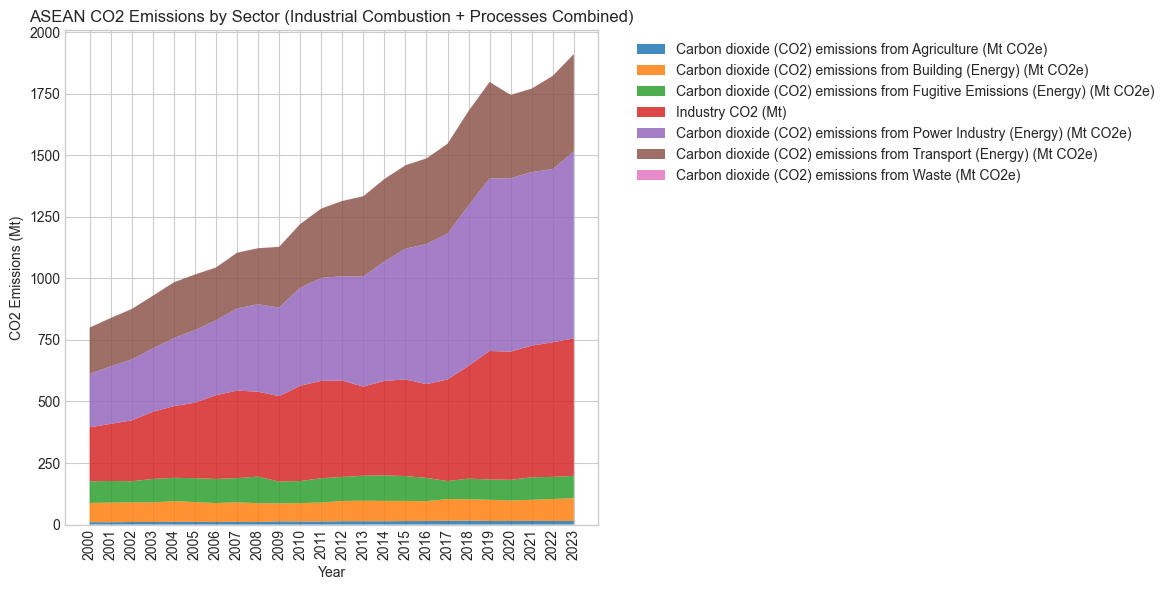

In [308]:
# Sector grouping
sector_cols_combined = [
    "Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)",
    "Industry CO2 (Mt)",   # < COMBINED INDUSTRIAL COMBUSTION + INDUSTRIAL PROCESSES
    "Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e)",
    "Carbon dioxide (CO2) emissions from Waste (Mt CO2e)"
]

# Sum ASEAN’s total by year
asean_sector_combined = merged.groupby("Time")[sector_cols_combined].sum()

plt.figure(figsize=(12, 6))
plt.stackplot(
    asean_sector_combined.index,
    asean_sector_combined.T.values,
    labels=sector_cols_combined,
    alpha=0.85
)

plt.title("ASEAN CO2 Emissions by Sector (Industrial Combustion + Processes Combined)")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Mt)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Rotate year labels vertically
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


All major sectors in ASEAN show rising CO₂ emissions over time, with power and industry taking up the biggest share, so the increase isn’t coming from just one source but from multiple sectors growing at the same time.

# Conclusion

From 2000 to 2023, ASEAN shows a consistent pattern: the region is getting more industrialized, and emissions rise along with it. Industry value added increases from **around 33% of GDP in 2000** to **about 36% in 2023**, and employment in industry grows from **about 16.5%** to **a little above 20%** over the same period. At the same time, total CO₂ emissions jump sharply, from **around 800 Mt in 2000** to **almost 1900 Mt in 2023**.

Industry contributes to this rise, but it’s not the only driver. The sector’s share of CO₂ emissions moves upward over the long run, from **about 20%** to **around 26%**, yet the stacked chart shows that **power and transport** also grow significantly and take up a large portion of total emissions.

Overall, the data suggests that ASEAN’s economic growth and rising industrial activity are linked to higher emissions, but reducing CO₂ in the future will require addressing **multiple sectors**, not just industry alone.
